In [70]:
%pylab inline
from IPython.display import Image
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
#支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['e', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [71]:
D = loadtxt("Full_TAVG_complete.txt", comments="%")
T0 = 8.79
years_int = D[:, 0]
months = D[:, 1]
years = years_int + (months-1) / 12
temp = D[:, 2] + T0
unc = D[:, 3]
temp1 = D[:, 4] + T0
unc1 = D[:, 5]
temp5 = D[:, 6] + T0
unc5 = D[:, 7]
temp10 = D[:, 8] + T0
unc10 = D[:, 9]
temp20 = D[:, 10] + T0
unc20 = D[:, 11]

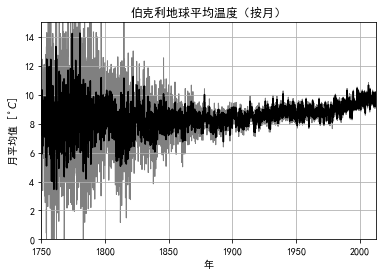

In [72]:
fill_between(years, temp+unc, temp-unc, color="gray")
plot(years, temp, "k-")
xlabel("年")
ylabel("月平均值 [$^\circ C$]")
title("伯克利地球平均温度（按月）")
xlim([1750, 2013])
ylim([0, 15])
grid();

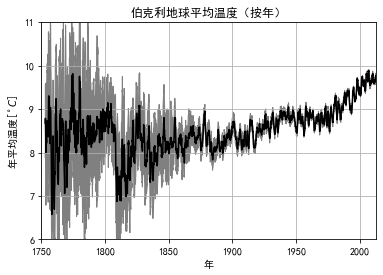

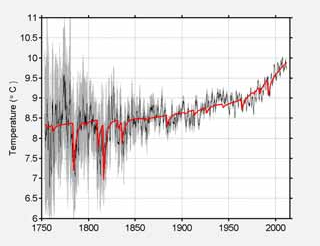

In [73]:
fill_between(years, temp1+unc1, temp1-unc1, color="gray")
plot(years, temp1, "k-")
xlabel("年")
ylabel("年平均温度[$^\circ C$]")
title("伯克利地球平均温度（按年）")
xlim([1750, 2013])
ylim([6, 11])
grid()
show()

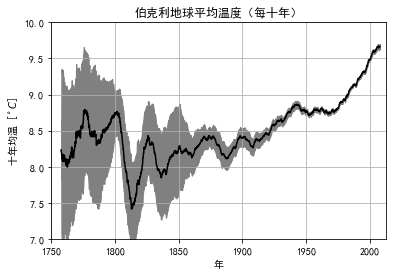

In [74]:
fill_between(years, temp10+unc10, temp10-unc10, color="gray")
plot(years, temp10, "k-")
xlabel("年")
ylabel("十年均温 [$^\circ C$]")
title("伯克利地球平均温度（每十年）")
xlim([1750, 2013])
ylim([7, 10])
grid()
show()

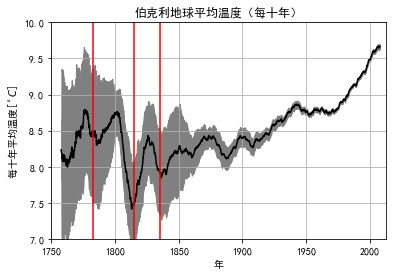

In [75]:
fill_between(years, temp10+unc10, temp10-unc10, color="gray")
plot(years, temp10, "k-")
erupations = [1783, 1815, 1835]
for e in erupations:
    plot([e, e], [0, 100], "r-")
xlabel("年")
ylabel("每十年平均温度[$^\circ C$]")
title("伯克利地球平均温度（每十年）")
xlim([1750, 2013])
ylim([7, 10])
grid();

In [76]:
from scipy.optimize import curve_fit
idx1980 = sum(years < 1980)
idx2010 = sum(years < 2010)
Y0 = 1980
def f(x, a, b):
    return a*(x-Y0)+b
(a, b), pcov = curve_fit(f, years[idx1980:idx2010], temp[idx1980:idx2010], p0=(1, 1), sigma=unc[idx1980:idx2010])
adev = sqrt(pcov[0, 0])
bdev = sqrt(pcov[1, 1])
print ("par              dev")
print (a, adev)
print (b, bdev)

par              dev
0.024995728289171636 0.0020446068501043806
8.95873498327875 0.03808710727169226


## 线性回归求得拟合曲线

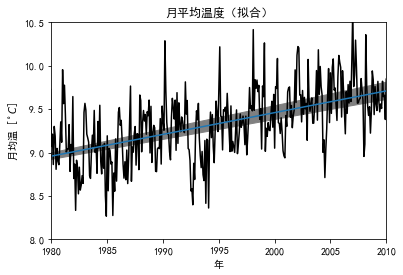

In [77]:
plot(years, temp, "k-")
xlabel("年")
ylabel("月均温 [$^\circ C$]")
title("月平均温度（拟合）")
plot(years, a*(years-Y0)+b)
fill_between(years, (a+adev)*(years-Y0)+b+bdev, (a-adev)*(years-Y0)+b-bdev, color="gray")
xlim([1980, 2010])
ylim([8, 10.5]);

In [78]:
dT = a * 30 # "a" is C/year, so we multiply by 30 years
dT

0.7498718486751491

In [79]:
dTdt = a*10 # C / decade
dTdt

0.24995728289171637